<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [1]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

Init Plugin
Init Graph Optimizer
Init Kernel


The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [2]:
pwd

'/Users/emresengul/Desktop/CNN'

In [5]:
my_data_dir = '/Users/emresengul/Desktop/CNN/data'

In [6]:
os.listdir(my_data_dir)

['.DS_Store', 'test', 'train', 'validation']

In [97]:
test_path = my_data_dir+'/test'
train_path = my_data_dir+"/train"
validation_path = my_data_dir+"/validation"



# Ekstra
train_path_dog = my_data_dir+"/train/dog"
train_path_cat = my_data_dir+"/train/cat"

In [15]:
os.listdir(train_path)

['cat', '.DS_Store', 'dog']

**Let's check how many images there are.**

In [17]:
len(os.listdir(train_path_cat))

12500

In [18]:
len(os.listdir(train_path_dog))

5026

In [30]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes
dog_zero = os.listdir(train_path_dog)[1]
cat_one = os.listdir(train_path_cat)[0]

In [31]:
dog_zero

'dog.11102.jpg'

In [246]:
train_path_dog+"/"+dog_zero

'/Users/emresengul/Desktop/CNN/data/train/dog/dog.11102.jpg'

In [245]:
dog = imread(train_path_dog+"/"+dog_zero)
dog

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

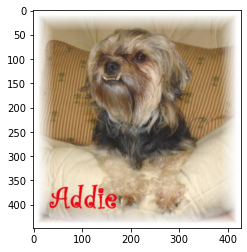

In [33]:
plt.imshow(dog)

In [34]:
cat = imread(train_path_cat+"/"+cat_one)
cat

array([[[ 58, 116, 156],
        [ 52, 111, 151],
        [ 47, 110, 151],
        ...,
        [ 20, 132, 196],
        [ 22, 129, 183],
        [ 27, 128, 172]],

       [[ 64, 123, 163],
        [ 55, 117, 156],
        [ 47, 112, 152],
        ...,
        [ 22, 130, 195],
        [ 23, 127, 182],
        [ 27, 125, 172]],

       [[ 70, 134, 172],
        [ 57, 122, 160],
        [ 45, 113, 152],
        ...,
        [ 25, 127, 193],
        [ 24, 123, 180],
        [ 29, 121, 170]],

       ...,

       [[ 14,  47,  66],
        [ 13,  46,  65],
        [ 12,  45,  64],
        ...,
        [ 11,  69, 107],
        [ 17,  79, 118],
        [ 20,  83, 126]],

       [[ 13,  46,  65],
        [ 12,  45,  64],
        [ 11,  44,  63],
        ...,
        [  0,  48,  81],
        [  8,  61,  95],
        [ 14,  68, 104]],

       [[ 12,  45,  62],
        [ 12,  45,  64],
        [ 10,  43,  62],
        ...,
        [  0,  34,  63],
        [  3,  44,  74],
        [  7,  52,  83]]

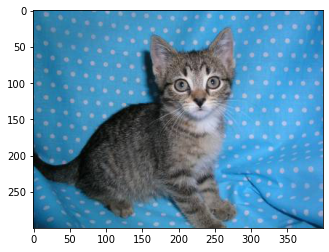

In [35]:
plt.imshow(cat)

**Let's decide on the final dimension of these images.**

In [257]:
for image in os.listdir(train_path_dog):
    img = imread(train_path_dog+'/'+image)
    break
    
img.shape

(392, 393, 3)

In [56]:
dog_x = []
dog_y = []
for image in os.listdir(train_path_dog):
    img = imread(train_path_dog+'/'+image)
    d1,d2,colors = img.shape
    dog_x.append(d1)
    dog_y.append(d2)

In [61]:
import seaborn as sns

/Users/emresengul/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

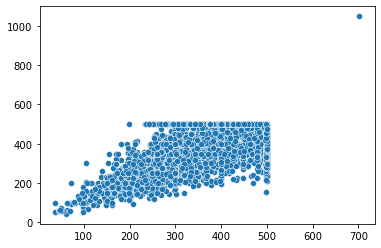

In [62]:
sns.scatterplot(dog_x,dog_y)

In [159]:
from PIL import Image

In [265]:
a = train_path_dog+'/dog.231.jpg'

In [266]:
imread(a).shape

(374, 500, 3)

In [267]:
from PIL import Image

# Open Paddington
img = Image.open(a)

# Resize smoothly down to 200x200 pixels
imgSmall = img.resize((200,200),resample=Image.BILINEAR)

# Scale back up using NEAREST to original size
result = imgSmall.resize(img.size,Image.NEAREST)

# Save
result.save('result.png')

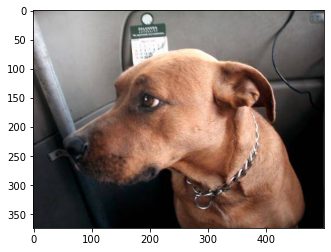

In [74]:
plt.imshow(imread(train_path_dog+'/dog.231.jpg'))

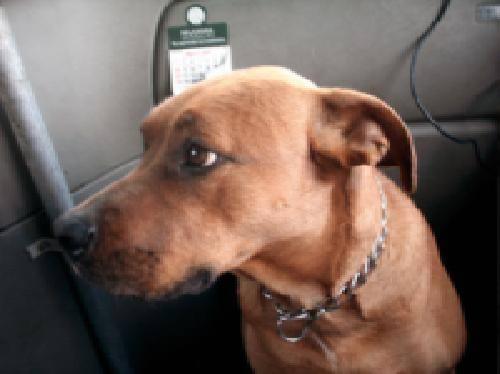

In [170]:
a = pd.Series(dog_x)
a[a<200]

80      149
99       37
109     199
117     130
125     177
       ... 
4959    125
4981    150
4983    172
4997    165
5022    161
Length: 335, dtype: int64

In [171]:
os.listdir(train_path_dog)[80]

'dog.2892.jpg'

In [273]:
b = train_path_dog+'/dog.2892.jpg'

In [275]:
imread(b).shape

(149, 118, 3)

In [277]:
from PIL import Image

# Open Paddington
img = Image.open(b)

# Resize smoothly down to 200x200 pixels
imgSmall = img.resize((500,500),resample=Image.BILINEAR)

# Scale back up using NEAREST to original size
result = imgSmall.resize(img.size,Image.NEAREST)

# Save
result.save('result2.png')

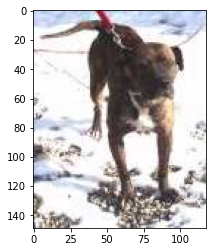

In [278]:
plt.imshow(imread(train_path_dog+'/dog.2892.jpg'))

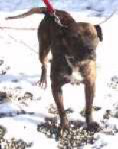

In [191]:
b = imread("result2.png")

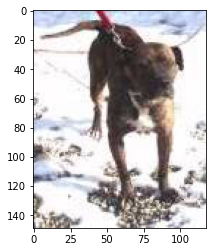

In [192]:
plt.imshow(b)

In [76]:
cat_x = []
cat_y = []
for image in os.listdir(train_path_cat):
    img = imread(train_path_cat+'/'+image)
    d1,d2,colors = img.shape
    cat_x.append(d1)
    cat_y.append(d2)

/Users/emresengul/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

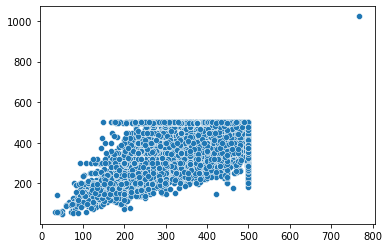

In [77]:
sns.scatterplot(cat_x,cat_y)

In [78]:
test_x = []
test_y = []
for image in os.listdir(test_path):
    img = imread(test_path+'/'+image)
    d1,d2,colors = img.shape
    test_x.append(d1)
    test_y.append(d2)

/Users/emresengul/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

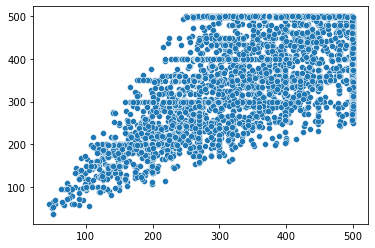

In [79]:
sns.scatterplot(test_x,test_y)

In [193]:
image_shape = (400,400,3)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [304]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

In [305]:
example_image = imread(train_path_dog+"/"+os.listdir(train_path_dog)[0])

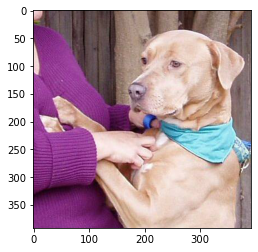

In [306]:
plt.imshow(example_image)

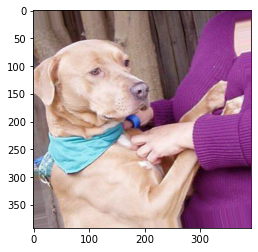

In [307]:
plt.imshow(image_gen.random_transform(example_image))

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [ ]:
ImageDataGenerator.flow_from_directory

In [212]:
image_shape[:2]

(400, 400)

In [309]:
image_shape

(400, 400, 3)

In [217]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 17526 images belonging to 2 classes.


In [218]:
test_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2290 images belonging to 2 classes.


In [219]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

# Creating the Model

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [312]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(4, 4)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [313]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 396, 396, 32)      2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 95, 95, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 19, 19, 64)        102464    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

## Early Stopping

In [222]:
from tensorflow.keras.callbacks import EarlyStopping

In [223]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Model Training

In [315]:
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [316]:
%%time
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20


2021-11-04 13:31:08.168649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1096/1096 [==============================] - ETA: 0s - loss: 0.5956 - accuracy: 0.7153

2021-11-04 13:39:13.676582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1096/1096 [==============================] - 536s 489ms/step - loss: 0.5956 - accuracy: 0.7153 - val_loss: 0.6839 - val_accuracy: 0.5948
Epoch 2/20
1096/1096 [==============================] - 521s 475ms/step - loss: 0.5344 - accuracy: 0.7383 - val_loss: 0.6517 - val_accuracy: 0.6297
Epoch 3/20
1096/1096 [==============================] - 508s 463ms/step - loss: 0.4810 - accuracy: 0.7761 - val_loss: 0.6786 - val_accuracy: 0.6638
Epoch 4/20
1096/1096 [==============================] - 1678s 2s/step - loss: 0.4432 - accuracy: 0.7946 - val_loss: 0.5017 - val_accuracy: 0.7620
Epoch 5/20
1096/1096 [==============================] - 7143s 7s/step - loss: 0.4040 - accuracy: 0.8143 - val_loss: 0.5132 - val_accuracy: 0.7642
Epoch 6/20
1096/1096 [==============================] - 4018s 4s/step - loss: 0.3802 - accuracy: 0.8297 - val_loss: 0.5104 - val_accuracy: 0.7646
CPU times: user 39min 1s, sys: 5min 25s, total: 44min 27s
Wall time: 4h 5s


# Evaluating the Model

In [317]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.595632,0.715337,0.683907,0.594760
1,0.534446,0.738275,0.651732,0.629694
2,0.481048,0.776104,0.678573,0.663755
3,0.443232,0.794591,0.501724,0.762009
4,0.403975,0.814333,0.513227,0.764192


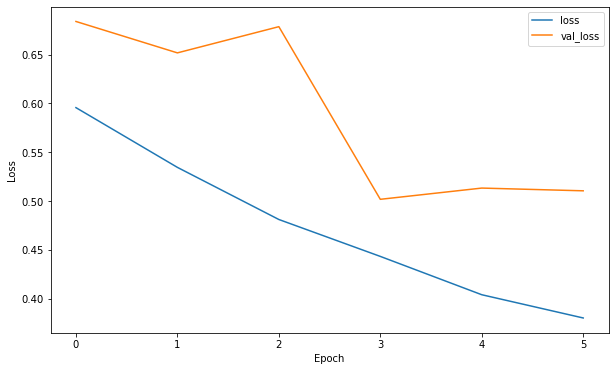

In [318]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

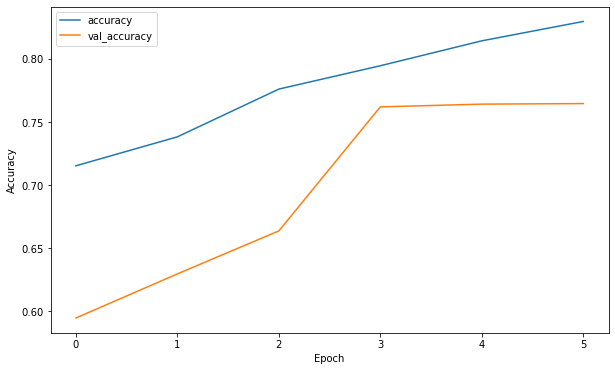

In [319]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [320]:
model.metrics_names

['loss', 'accuracy']

In [321]:
model.evaluate_generator(test_image_gen)

[0.49789854884147644, 0.7751091718673706]

In [322]:
from tensorflow.keras.preprocessing import image

In [323]:
preds = model.predict_generator(test_image_gen)

2021-11-04 17:35:08.483911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [324]:
preds

array([[0.00404728],
       [0.35066563],
       [0.02796147],
       ...,
       [0.6576577 ],
       [0.7808739 ],
       [0.3044417 ]], dtype=float32)

In [325]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [326]:
predictions = preds > 0.5

In [ ]:
predictions = pred_probabilities > 0.5

In [328]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [327]:
from sklearn.metrics import classification_report,confusion_matrix

In [329]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      1219
           1       0.93      0.55      0.69      1071

    accuracy                           0.77      2290
   macro avg       0.82      0.76      0.75      2290
weighted avg       0.81      0.77      0.76      2290



In [330]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1175,   44],
       [ 483,  588]])

In [331]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [332]:
from PIL import Image

In [341]:
my_image = image.load_img(test_path+"/2749.jpg", target_size=image_shape)

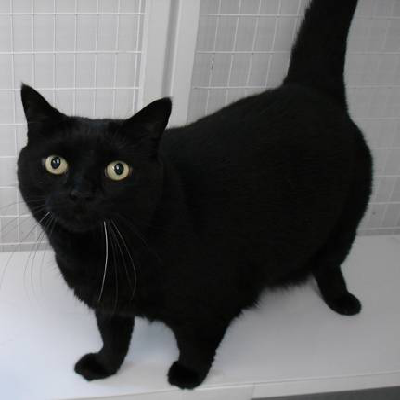

In [342]:
my_image

In [343]:
my_image = image.img_to_array(my_image)

In [344]:
my_image.shape

(400, 400, 3)

In [345]:
my_image = np.expand_dims(my_image, axis=0)

In [346]:
my_image.shape

(1, 400, 400, 3)

In [347]:
model.predict(my_image)

2021-11-04 17:43:27.807980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.]], dtype=float32)

In [348]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}